<a href="https://colab.research.google.com/github/cris080488/Applied-Data-Science-IBM/blob/main/Data_Analysis_with_python_ENKI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparing a Dataset


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Creating a dataframe from Series

In [83]:
firstSeries = pd.Series([21,24,23])
secondSeries = pd.Series(["Stephan", "Marcus", "Emma"])

f = {"Name":secondSeries, "Age":firstSreies}

df = pd.DataFrame(f)

Creating a dataframe from csv file

In [84]:
importedRawData = pd.read_csv('netflix_titles.csv')

### Operations with dataframes

Showing head and tail rows

In [85]:
importedRawData.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [86]:
importedRawData.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


The total amount null rows

In [87]:
importedRawData.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Droping columns of the dataframe

In [88]:
importedData = importedRawData.drop( columns=["show_id", "description", "country", "date_added", "director"])

Using loc function

In [89]:
netflix_movies = importedData.loc[importedData['type'] == 'Movie']
netflix_series = importedData.loc[importedData['type'] == 'TV Show']

In [90]:
print(netflix_movies.count())
print(netflix_series.count())

type            5377
title           5377
cast            4951
release_year    5377
rating          5372
duration        5377
listed_in       5377
dtype: int64
type            2410
title           2410
cast            2118
release_year    2410
rating          2408
duration        2410
listed_in       2410
dtype: int64


Plot a chart with matplotlib

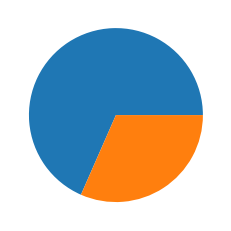

In [91]:
plt.pie([4265,1969])
plt.show()

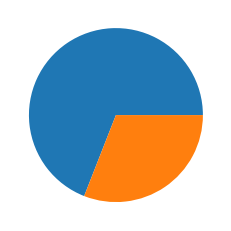

In [92]:
plt.pie([netflix_movies.type.count(),
        netflix_series.type.count()
])

plt.show()

Plot labels and titles and formating them

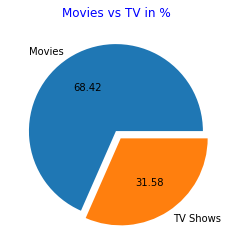

In [93]:
plt.pie([4265,1969],
        labels=['Movies', 'TV Shows'],
        textprops={'color':"black"},
        autopct='%.2f',
        explode=(0,0.1))

plt.title('Movies vs TV in %',
          color="blue")
plt.show()

count values

In [94]:
movies_ratings = netflix_movies.value_counts('rating')

another ways to count values

In [95]:
netflix_movies.rating.value_counts()

TV-MA       1845
TV-14       1272
R            663
TV-PG        505
PG-13        386
PG           247
TV-Y         117
TV-G         111
TV-Y7         95
NR            79
G             39
TV-Y7-FV       5
UR             5
NC-17          3
Name: rating, dtype: int64

In [96]:
ratingTVY = netflix_movies.loc[netflix_movies['rating'] == 'TV-Y'].count()

Plot chart bars

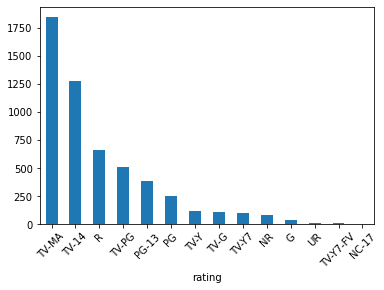

In [97]:
movies_ratings.plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

In [98]:
df2 = pd.DataFrame(
    {
        'col1':['A', 'A', 'A', 'B'],
        'col2':[1,2,3,4]
    }
)

Grouping a dataframe

In [99]:
df2 = df2.groupby("col1").size()

In [100]:
df2.to_frame(name="sum")

,sum
col1,
A,3
B,1


In [101]:
df2.reset_index(name='blah')

,col1,blah
0,A,3
1,B,1


Grouping with to_frame and reset_index

In [102]:
netflix_series\
.groupby('rating').size()\
.sort_values(ascending=False)\
.to_frame("Sum of TV Shows")\
.reset_index('rating')


,rating,Sum of TV Shows
0,TV-MA,1018
1,TV-14,659
2,TV-PG,301
3,TV-Y7,176
4,TV-Y,163
5,TV-G,83
6,NR,5
7,R,2
8,TV-Y7-FV,1


Same way with one less step

In [103]:
netflix_series\
.groupby('rating').size()\
.sort_values(ascending=False)\
.reset_index(name="Sum of TV Shows")

,rating,Sum of TV Shows
0,TV-MA,1018
1,TV-14,659
2,TV-PG,301
3,TV-Y7,176
4,TV-Y,163
5,TV-G,83
6,NR,5
7,R,2
8,TV-Y7-FV,1


In [104]:
shows_per_rating = netflix_series\
.groupby('rating').size()\
.sort_values(ascending=False)\
.reset_index(name="Sum of TV Shows")

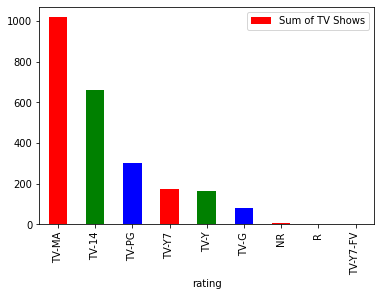

In [105]:
shows_per_rating.plot(
    x="rating",
    y="Sum of TV Shows",
    kind="bar",
    color=['red', 'green', 'blue']
)

plt.show()

In [106]:
movies_by_released_year = netflix_series\
.groupby('release_year').size()\
.sort_values(ascending=False)\
.reset_index(name='movie_count')

In [107]:
movies_before_1980 = movies_by_released_year[movies_by_released_year['release_year']<=1980] 

movies_between_1980_2000 = movies_by_released_year[(movies_by_released_year['release_year'] > 1980) & (movies_by_released_year['release_year'] < 2000)] 

movies_after_2000 = movies_by_released_year[movies_by_released_year['release_year'] >= 2000]

In [108]:
after_2000 = movies_after_2000.sort_values('release_year', ascending=False)

before_1979 = movies_before_1980.sort_values('release_year', ascending=False)

between_1980_2000 = movies_between_1980_2000.sort_values('release_year', ascending=False)

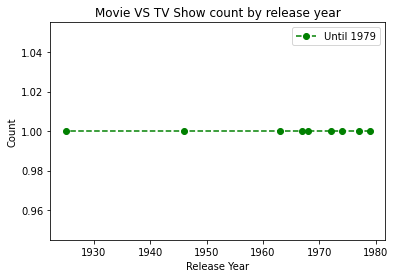

In [109]:
plt.plot(before_1979.release_year,\
         before_1979.movie_count,\
         label="Until 1979",\
         linestyle='--',\
         marker='o',\
         color='g'
         )

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Movie VS TV Show count by release year')
plt.legend()
plt.show()

In [118]:
noNanValueDF = importedData.dropna(subset=['cast'])

In [119]:
movieCast = noNanValueDF.loc[noNanValueDF['type'] == 'Movie']

tvshowCast = noNanValueDF.loc[noNanValueDF['type'] == 'TV Show']

In [131]:
splitMovieCast = movieCast.set_index('type')\
.cast.str.split(', ', expand=True)\
.stack()\
.reset_index('type')

In [132]:
splitMovieCast = \
  splitMovieCast\
  .rename(columns={0:'Actor'})

In [135]:
splitMovieCast\
    .sort_values('Actor')[['Actor','type']]

,Actor,type
6,Jr.,Movie
6,"""Riley"" Lakdhar Dridi",Movie
5,'Najite Dede,Movie
0,4Minute,Movie
7,50 Cent,Movie
...,...,...
7,Şinasi Yurtsever,Movie
6,Şinasi Yurtsever,Movie
3,Şükran Ovalı,Movie
5,Şükrü Özyıldız,Movie


In [136]:
splitMovieCast.reset_index(drop=True)

,type,Actor
0,Movie,Demián Bichir
1,Movie,Héctor Bonilla
2,Movie,Oscar Serrano
3,Movie,Azalia Ortiz
4,Movie,Octavio Michel
...,...,...
38307,Movie,Meghna Malik
38308,Movie,Malkeet Rauni
38309,Movie,Anita Shabdish
38310,Movie,Chittaranjan Tripathy


In [137]:
splitMovieCast.reset_index()

,index,type,Actor
0,0,Movie,Demián Bichir
1,1,Movie,Héctor Bonilla
2,2,Movie,Oscar Serrano
3,3,Movie,Azalia Ortiz
4,4,Movie,Octavio Michel
...,...,...,...
38307,4,Movie,Meghna Malik
38308,5,Movie,Malkeet Rauni
38309,6,Movie,Anita Shabdish
38310,7,Movie,Chittaranjan Tripathy


In [138]:
moviePerActor = splitMovieCast\
.groupby('Actor')\
.size()\
.sort_values(ascending=False)\
.reset_index(name="Sum of Movies")

In [139]:
moviePerActor

,Actor,Sum of Movies
0,Anupam Kher,41
1,Shah Rukh Khan,35
2,Naseeruddin Shah,30
3,Om Puri,30
4,Akshay Kumar,29
...,...,...
23044,Mei Nagano,1
23045,Mel Johnson Jr.,1
23046,Mela Lee,1
23047,Melanie Chandra,1
